# Testing model using interpreter

In [1]:
# import library

import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import json, requests

In [2]:
# defining class name
class_name = ['chickenpox', 'normal', 'scabies']

# Use this code when the test use keras model

In [3]:
# download model *.h5
!gdown 107fvLNaXsLk2OTvCVbLQb-JrxHN_5Jpk

Downloading...
From: https://drive.google.com/uc?id=107fvLNaXsLk2OTvCVbLQb-JrxHN_5Jpk
To: /content/model1.16-0.84.h5
100% 9.81M/9.81M [00:00<00:00, 43.1MB/s]


In [ ]:
# load the model
skin_disease = 'model1.16-0.84.h5'

model = keras.models.load_model(skin_disease, custom_objects={'KerasLayer':hub.KerasLayer})
model.get_config()


Saving 27.JPG to 27.JPG


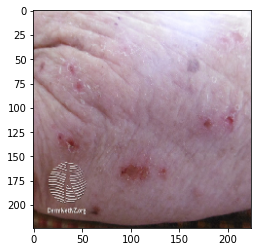


Predicting: 75.41% of scabies
tf.Tensor([2.4558376e-01 2.6628657e-04 7.5414991e-01], shape=(3,), dtype=float32)


In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  plt.imshow(img)
  plt.show()

  img = tf.keras.utils.img_to_array(img)
  img = img.astype(np.float32) / 255
  img = np.expand_dims(img, axis=0)
  images = np.vstack([img])

  output_data = model(images)
  pred = np.argmax(output_data, axis=1)

  data = {'persentase' : np.max(output_data)*100, 'pred' : class_name[pred[0]]}
  with open ('file.json', 'w') as f:
    json.dump(data, f, indent=4)

  print(f"\nPredicting: {(np.max(output_data))*100:.2f}% of {class_name[pred[0]]}")
  print(output_data[0])


# Use this code when the test use tflite model

In [10]:
# download model *.tflite
!gdown 1CPGwdBWaWCW1_EPEAoT77R7EaPm3dmse

Downloading...
From: https://drive.google.com/uc?id=1CPGwdBWaWCW1_EPEAoT77R7EaPm3dmse
To: /content/converted_model.tflite
100% 2.69M/2.69M [00:00<00:00, 152MB/s]


In [11]:
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

In [12]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

[{'name': 'serving_default_keras_layer_1_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 183, 'shape': array([1, 3], dtype=int32), 'shape_signature': array([-1,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


Saving 1 (6853.JPG to 1 (6853.JPG


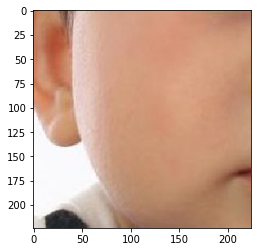


Predicting: 91.86% of normal
[[0.02066051 0.9186242  0.06071534]]


In [14]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  plt.imshow(img)
  plt.show()

  img = tf.keras.utils.img_to_array(img)
  img = img.astype(np.float32) / 255
  img = np.expand_dims(img, axis=0)
  images = np.vstack([img])

  input_shape = input_details[0]['shape']
  interpreter.set_tensor(input_details[0]['index'], images)

  interpreter.invoke()

  output_data = interpreter.get_tensor(output_details[0]['index'])
  pred = np.argmax(output_data, axis=1)

  data = {'persentase' : np.max(output_data)*100, 'pred' : class_name[pred[0]]}
  with open ('file.json', 'w') as f:
    json.dump(data, f, indent=4)

  print(f"\nPredicting: {(np.max(output_data))*100:.2f}% of {class_name[pred[0]]}")
  print(output_data)
